<a href="https://colab.research.google.com/github/xcyangxcy/tensorflow/blob/main/%E2%80%9Ctensorflow_%E6%91%84%E6%B0%8F%E5%BA%A6%E4%B8%8E%E5%8D%8E%E6%B0%8F%E5%BA%A6%E7%9A%84%E8%BD%AC%E6%8D%A2_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 导入依赖包

In [ ]:
import tensorflow as tf
import numpy as np
import logging

In [ ]:
logger = tf.get_logger()  #获取日志行为记录
logger.setLevel(logging.ERROR)  # 设置日志行为为：只有当发生严重错误(ERROR)时才会记录

## 设置训练数据

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)  # 摄氏度
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)  # 华氏度

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## 建立模型

一个神经网络由多个层组成，每个层都由多个神经元组成。每个神经元接收来自上一层的输入，对其进行一些计算，然后将结果传递给下一层。

例如，一个简单的全连接神经网络可能包含三层：输入层、隐藏层和输出层。

输入层：这是网络的开始，接收外部数据。如果你的数据有10个特征，那么输入层就有10个神经元。

隐藏层：这些层在输入层和输出层之间，每个层都由多个神经元组成。每个神经元都会接收来自上一层所有神经元的输入，对其进行加权求和，然后通过一个激活函数，如ReLU或sigmoid，输出结果。

输出层：这是网络的最后一层，输出网络的预测结果。输出层的神经元数量取决于你的任务。例如，对于二分类问题，你可能只需要一个神经元来输出预测的概率。

每个神经元与其下一层的每个神经元都有一个连接，每个连接都有一个权重，这些权重在训练过程中被学习和调整。

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## 将层组装到模型中

In [ ]:
model = tf.keras.Sequential([l0])

上面两步亦可以合称为一步：


```
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

```



## 编译模型，带有损失和优化函数在训练之前，必须对模型进行编译。
编译训练时，模型为:损失函数——一种测量预测与期望结果之间距离的方法。(测量的差异被称为“损失”。)<br>
优化器函数——一种调整内部值以减少损失的方法。

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

这段代码是在配置模型的学习过程，它使用了compile方法。

model.compile函数用于配置模型的学习过程，它接收三个主要参数：优化器（optimizer）、损失函数（loss）和评估指标（metrics）。

在你的代码中：

loss='mean_squared_error'：这是损失函数，也就是模型试图最小化的目标函数。这里使用的是均方误差（Mean Squared Error），它是回归问题常用的损失函数。

optimizer=tf.keras.optimizers.Adam(0.1)：这是优化器，决定如何更新网络的权重。这里使用的是Adam优化器，它是一种常用的、效果良好的优化器。0.1是学习率，决定了权重更新的快慢，这是一个超参数，需要你手动设定。

简单来说，就是本次学习中，用'mean_squared_error'来计算预测结果与期望值之间的差距（即损失），学习的效率是0.1（0.1-0.001）之间的任何数字都可以

## 训练模型


*  celsius_q是输入数据，fahrenheit_a是目标数据。模型会学习如何从celsius_q预测fahrenheit_a。
*  epochs=500表示你要训练500轮。在每一轮中，模型都会看到所有的输入数据（一次或多次，这取决于其他参数，如batch_size）
*  verbose=False表示在训练过程中不打印详细的日志信息


In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## 显示训练统计数据
* 使用plt方法绘制出损失值在训练过程中的变化趋势

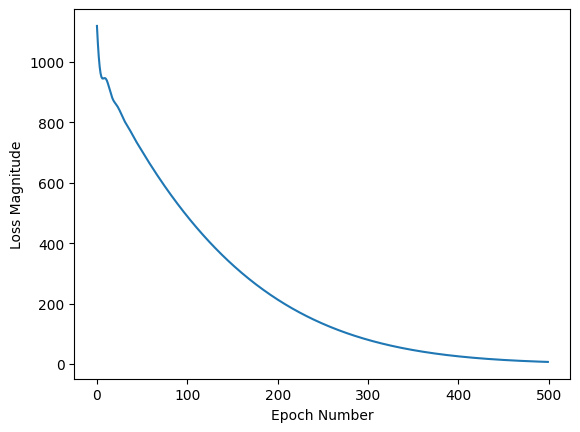

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## 使用模型预测结果


In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 141ms/step
[[211.33832]]


正确答案是100 × 1.8+32=212，所以我们的模型做得很好。<br>
我们创建了一个具有Dense层的模型我们用3500个例子(7对，500个epoch)来训练它。我们的模型自动调整了Dense层中的变量(权重)，直到它能够为任何摄氏度值返回正确的华氏温度。(请记住，100摄氏度不是我们训练数据的一部分。)

## 查看内部变量(权重)

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8201864]], dtype=float32), array([29.319687], dtype=float32)]


摄氏度转换华氏度：f=1.8c+32
可以看出，我们模型训练出的第一个值接近1.8，第二个值接近32

## 一个小实验，创建更多密集层

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 181ms/step
[[211.74745]]
1/1 [==============================] - 0s 79ms/step
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[-0.13049011, -0.6518327 ,  0.00374866,  0.5716933 ]],
      dtype=float32), array([-3.4445047, -3.6078477, -1.5946754,  3.7356288], dtype=float32)]
These are the l1 variables: [array([[ 0.8927841 ,  1.0092483 ,  1.2111799 ,  0.82149565],
       [ 0.6707155 ,  0.60707295,  0.27269116, -0.45075792],
       [ 0.02186883,  0.727707  , -0.68735874, -0.93562   ],
       [ 0.8380981 , -0.55066496, -0.90294516,  0.06207708]],
      dtype=float32), array([-3.2885096 , -3.5088904 , -3.671486  , -0.11795927], dtype=float32)]
These are the l2 variables: [array([[-0.61249036],
       [-1.3465383 ],
       [-0.74705195],
       [-0.07542934]], dtype=float32), array([3.5162232], dtype=float32)]
